In [1]:
pwd


'C:\\Users\\balag'

In [2]:
import os 
os.chdir('E:/Python') 

In [336]:
pwd


'E:\\Python'

In [337]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read data from files

In [338]:
df=pd.read_csv('E:\Fall\MOD B\APA1\group assignment 1\HW1 bikeshare.csv')
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


We will check whether the data has missing values.
Upon checking we see that it does not have one

In [339]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


We will create check for outlier in continous variables in the dataset

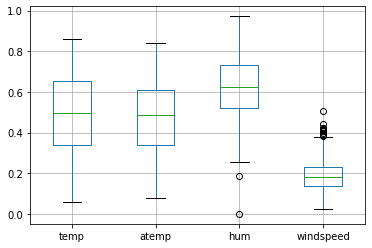

In [341]:
df[['temp','atemp','hum','windspeed']].boxplot()

We see that windspeed had outlier

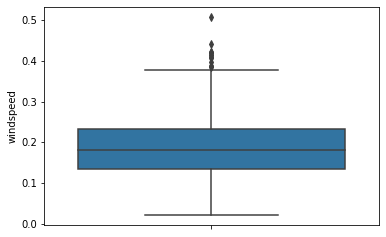

In [342]:
sns.boxplot(y='windspeed',data=df,order='vertical')


In [343]:
#outlier imputation with mean values


outlier=['hum','windspeed']
for i in outlier :
    upper_quartile = np.percentile(df[i],75)
    lower_quartile = np.percentile(df[i],25)
    iqr = upper_quartile - lower_quartile
    
    
    min=np.maximum(lower_quartile-(iqr*1.5),0)
    max=upper_quartile+(iqr*1.5)
    
    df[i]=np.where((df[i] >= max)|(df[i] <= min),np.nan,df[i])

In [344]:
df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual         0
registered     0
cnt            0
dtype: int64

In [345]:
for v in outlier:
    
    df[v].fillna(value=df[v].mean(),inplace=True)

In [346]:
X=df.loc[:,'season':'windspeed']
y=df['cnt']
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [347]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=0)

In [348]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [349]:
y_pred=regressor.predict(X_test)


In [295]:
import statsmodels.regression.linear_model as lm

X_train=pd.concat([pd.DataFrame(np.ones((X_train.shape[0],1)).astype(int),index=X_train.index),X_train],axis=1)
X_train.rename(columns={0: 'const'}, inplace=True)



In [299]:
X_train.sort_index().head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
9,1,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267
11,1,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627
19,1,1,0,1,0,4,1,2,0.261667,0.255050,0.538333,0.195904
23,1,1,0,1,0,1,1,1,0.097391,0.117930,0.491739,0.158330
28,1,1,0,1,0,6,0,1,0.196522,0.212126,0.651739,0.145365


In [300]:
#backword elimination
regressor_ols = lm.OLS(endog=y_train.astype(float),exog=X_train.astype(float)).fit()
regressor_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     48.92
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.68e-41
Time:                        23:23:47   Log-Likelihood:                -1187.4
No. Observations:                 146   AIC:                             2399.
Df Residuals:                     134   BIC:                             2435.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        978.0835    528.929      1.849      0.067     -68.045    2024.212
season       576.5961    162.595      3.546      0.001     255.012     898.180
yr          2006.0612    147.359     13.613      0.000    1714.611    2297.511
mnth         -50.1753     51.784     -0.969      0.334    -152.595      52.244
holiday       51.4361    430.247      0.120      0.905    -799.518     902.391
weekday       18.8639     37.452      0.504      0.615     -55.210      92.938
workingday     7.1746    165.686      0.043      0.966    -320.524     334.873
weathersit  -590.6984    174.140     -3.392      0.001    -935.118    -246.279
temp        4739.3243   1686.329      2.810      0.006    1404.059    8074.590
atemp        155.4185   1898.307      0.082      0.935   -3599.101    3909.938
hum         -327.0738    682.465     -0.479      0.633   -1676.871    1022.723
windspeed   -523.0352   1096.620     -0.477      0.634   -2691.959    1645.889
==============================================================================
Omnibus:                       15.277   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.823
Skew:                          -0.560   Prob(JB):                     1.11e-05
Kurtosis:                       4.580   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
X_1 =X_train.drop(['workingday'],axis=1)
regressor_ols = lm.OLS(endog=y_train,exog=X_1).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     54.22
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           2.22e-42
Time:                        23:25:18   Log-Likelihood:                -1187.4
No. Observations:                 146   AIC:                             2397.
Df Residuals:                     135   BIC:                             2430.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        983.8547    509.967      1.929      0.056     -24.703    1992.412
season       576.5647    161.991      3.559      0.001     256.196     896.933
yr          2006.6118    146.266     13.719      0.000    1717.343    2295.880
mnth         -50.1602     51.591     -0.972      0.333    -152.191      51.871
holiday       46.3677    412.487      0.112      0.911    -769.405     862.140
weekday       18.8366     37.308      0.505      0.614     -54.947      92.621
weathersit  -589.6989    171.965     -3.429      0.001    -929.792    -249.606
temp        4744.2471   1676.262      2.830      0.005    1429.118    8059.377
atemp        148.4650   1884.497      0.079      0.937   -3578.491    3875.421
hum         -329.7638    677.115     -0.487      0.627   -1668.888    1009.361
windspeed   -521.0703   1091.623     -0.477      0.634   -2679.965    1637.825
==============================================================================
Omnibus:                       15.428   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.112
Skew:                          -0.564   Prob(JB):                     9.58e-06
Kurtosis:                       4.589   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
X_1 =X_1.drop(['atemp'],axis=1)
regressor_ols = lm.OLS(endog=y_train,exog=X_1).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     60.68
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           2.77e-43
Time:                        23:26:00   Log-Likelihood:                -1187.4
No. Observations:                 146   AIC:                             2395.
Df Residuals:                     136   BIC:                             2425.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        992.6275    495.839      2.002      0.047      12.076    1973.179
season       576.7264    161.385      3.574      0.000     257.578     895.875
yr          2005.6694    145.242     13.809      0.000    1718.444    2292.894
mnth         -50.1643     51.402     -0.976      0.331    -151.815      51.487
holiday       45.4969    410.830      0.111      0.912    -766.944     857.938
weekday       18.5754     37.024      0.502      0.617     -54.643      91.793
weathersit  -589.6984    171.335     -3.442      0.001    -928.524    -250.873
temp        4872.1718    414.660     11.750      0.000    4052.156    5692.188
hum         -328.7488    674.514     -0.487      0.627   -1662.642    1005.144
windspeed   -530.5056   1081.062     -0.491      0.624   -2668.371    1607.360
==============================================================================
Omnibus:                       15.298   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.915
Skew:                          -0.560   Prob(JB):                     1.06e-05
Kurtosis:                       4.585   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
X_1 =X_1.drop(['holiday'],axis=1)
regressor_ols = lm.OLS(endog=y_train,exog=X_1).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     68.76
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.24e-44
Time:                        23:26:27   Log-Likelihood:                -1187.4
No. Observations:                 146   AIC:                             2393.
Df Residuals:                     137   BIC:                             2420.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        998.0029    491.675      2.030      0.044      25.749    1970.257
season       572.2377    155.648      3.676      0.000     264.454     880.021
yr          2004.4318    144.289     13.892      0.000    1719.111    2289.753
mnth         -48.4988     48.975     -0.990      0.324    -145.344      48.347
weekday       18.3866     36.852      0.499      0.619     -54.485      91.258
weathersit  -590.0490    170.687     -3.457      0.001    -927.571    -252.527
temp        4877.7941    410.054     11.895      0.000    4066.940    5688.648
hum         -335.2537    669.525     -0.501      0.617   -1659.194     988.686
windspeed   -530.6434   1077.157     -0.493      0.623   -2660.647    1599.361
==============================================================================
Omnibus:                       15.438   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.289
Skew:                          -0.562   Prob(JB):                     8.77e-06
Kurtosis:                       4.602   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
X_1 =X_1.drop(['windspeed'],axis=1)
regressor_ols = lm.OLS(endog=y_train,exog=X_1).fit()
regressor_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     78.99
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.95e-45
Time:                        23:26:53   Log-Likelihood:                -1187.6
No. Observations:                 146   AIC:                             2391.
Df Residuals:                     138   BIC:                             2415.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        851.8524    391.007      2.179      0.031      78.712    1624.993
season       571.9686    155.219      3.685      0.000     265.053     878.885
yr          2013.0359    142.834     14.094      0.000    1730.610    2295.462
mnth         -48.1609     48.836     -0.986      0.326    -144.725      48.403
weekday       17.7820     36.730      0.484      0.629     -54.844      90.408
weathersit  -598.7281    169.309     -3.536      0.001    -933.503    -263.953
temp        4889.4231    408.250     11.977      0.000    4082.190    5696.656
hum         -254.0972    647.158     -0.393      0.695   -1533.725    1025.531
==============================================================================
Omnibus:                       13.926   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.916
Skew:                          -0.530   Prob(JB):                     4.73e-05
Kurtosis:                       4.466   Cond. No.                         85.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
X_1 =X_1.drop(['hum'],axis=1)
regressor_ols = lm.OLS(endog=y_train,exog=X_1).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     92.69
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           4.23e-46
Time:                        23:27:32   Log-Likelihood:                -1187.7
No. Observations:                 146   AIC:                             2389.
Df Residuals:                     139   BIC:                             2410.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        757.8936    308.284      2.458      0.015     148.362    1367.426
season       581.0903    153.003      3.798      0.000     278.575     883.605
yr          2019.9322    141.318     14.294      0.000    1740.521    2299.343
mnth         -51.0810     48.119     -1.062      0.290    -146.221      44.060
weekday       18.0853     36.610      0.494      0.622     -54.299      90.470
weathersit  -639.7389    132.845     -4.816      0.000    -902.396    -377.082
temp        4854.9130    397.461     12.215      0.000    4069.062    5640.764
==============================================================================
Omnibus:                       13.767   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.490
Skew:                          -0.529   Prob(JB):                     5.86e-05
Kurtosis:                       4.444   Cond. No.                         52.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
X_1 =X_1.drop(['weekday'],axis=1)
regressor_ols = lm.OLS(endog=y_train,exog=X_1).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     111.8
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           4.29e-47
Time:                        23:29:02   Log-Likelihood:                -1187.8
No. Observations:                 146   AIC:                             2388.
Df Residuals:                     140   BIC:                             2405.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        816.6431    283.652      2.879      0.005     255.847    1377.439
season       595.3225    149.860      3.973      0.000     299.041     891.604
yr          2020.8441    140.924     14.340      0.000    1742.230    2299.458
mnth         -54.7812     47.404     -1.156      0.250    -148.502      38.940
weathersit  -646.9482    131.684     -4.913      0.000    -907.294    -386.603
temp        4839.5879    395.177     12.247      0.000    4058.301    5620.874
==============================================================================
Omnibus:                       14.062   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.640
Skew:                          -0.524   Prob(JB):                     3.30e-05
Kurtosis:                       4.515   Cond. No.                         48.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
X_1 =X_1.drop(['mnth'],axis=1)
regressor_ols = lm.OLS(endog=y_train,exog=X_1).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.1
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           6.59e-48
Time:                        23:29:37   Log-Likelihood:                -1188.5
No. Observations:                 146   AIC:                             2387.
Df Residuals:                     141   BIC:                             2402.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        855.2738    282.011      3.033      0.003     297.758    1412.789
season       440.5042     67.237      6.552      0.000     307.581     573.427
yr          2007.8344    140.641     14.276      0.000    1729.797    2285.871
weathersit  -656.0555    131.604     -4.985      0.000    -916.227    -395.884
temp        4893.8480    392.844     12.457      0.000    4117.222    5670.474
==============================================================================
Omnibus:                       15.123   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.438
Skew:                          -0.558   Prob(JB):                     1.34e-05
Kurtosis:                       4.564   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

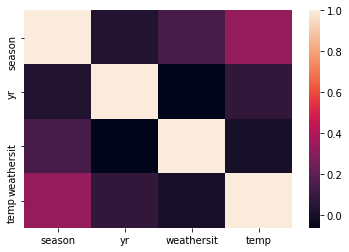

In [312]:

X_1.iloc[:,1:].corr()
sns.heatmap(X_1.iloc[:,1:].corr())


From the heat map ,we can see that the variables in the final model are not correlated,and we can say that there is no multicollinearity among the independent variables.

### Conclusion
We can say from the model that temperature influences the count of rides predominentaly,and the company should give more promotion when the temperature increases